# Data Collection

In [456]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

gold = yf.Ticker("GC=F")
hist = gold.history(period = "max")


In [457]:
# Load your gold price dataset (replace 'gold_price_data.csv' with your file)
ds = pd.DataFrame(hist)
ds = ds.reset_index()
ds = ds[['Date','Close']]
#Rename column
ds.columns = ['Date','Price']
ds.to_csv("goldprices.csv")

In [458]:
ds

,Date,Price
0,2000-08-30 00:00:00-04:00,273.899994
1,2000-08-31 00:00:00-04:00,278.299988
2,2000-09-01 00:00:00-04:00,277.000000
3,2000-09-05 00:00:00-04:00,275.799988
4,2000-09-06 00:00:00-04:00,274.200012
...,...,...
5942,2024-05-07 00:00:00-04:00,2315.199951
5943,2024-05-08 00:00:00-04:00,2313.600098
5944,2024-05-09 00:00:00-04:00,2332.100098
5945,2024-05-10 00:00:00-04:00,2367.300049


In [459]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load your gold price dataset (replace 'gold_price_data.csv' with your file)
ds = pd.read_csv("goldprices.csv")
ds = ds[['Date','Price']].dropna()
print(ds)

                           Date        Price
0     2000-08-30 00:00:00-04:00   273.899994
1     2000-08-31 00:00:00-04:00   278.299988
2     2000-09-01 00:00:00-04:00   277.000000
3     2000-09-05 00:00:00-04:00   275.799988
4     2000-09-06 00:00:00-04:00   274.200012
...                         ...          ...
5942  2024-05-07 00:00:00-04:00  2315.199951
5943  2024-05-08 00:00:00-04:00  2313.600098
5944  2024-05-09 00:00:00-04:00  2332.100098
5945  2024-05-10 00:00:00-04:00  2367.300049
5946  2024-05-13 00:00:00-04:00  2348.399902

[5947 rows x 2 columns]


In [460]:
print(f"The date range of gold prices available is from {ds.loc[:,'Date'][0]} to {ds.loc[:,'Date'][len(ds) - 1]}")

The date range of gold prices available is from 2000-08-30 00:00:00-04:00 to 2024-05-13 00:00:00-04:00


<Figure size 2000x800 with 0 Axes>

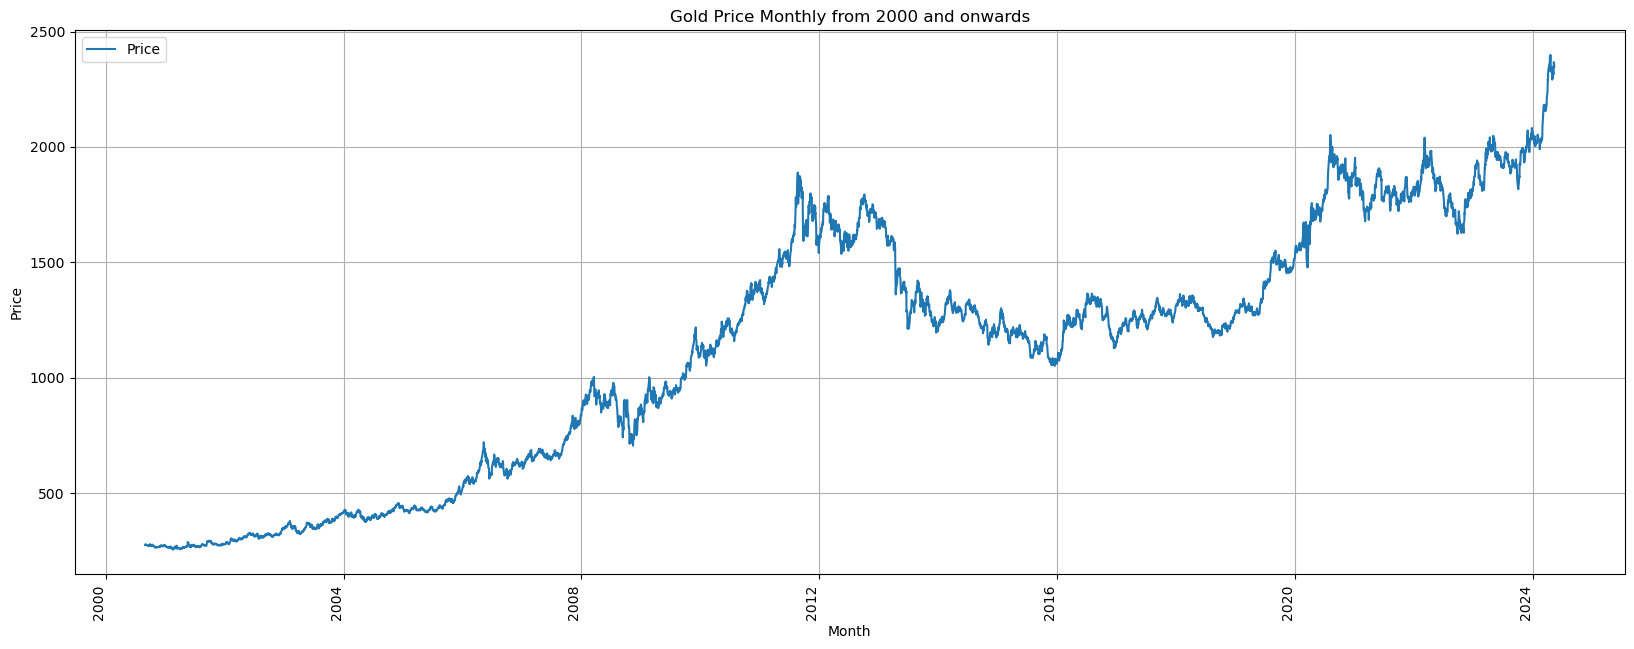

In [461]:
# Create a new dataframe with monthly dates as the index
df = ds
df["Date"] = pd.to_datetime(df["Date"],utc=True)
df = df.set_index('Date')
plt.figure(figsize=(20,8))
df.plot(figsize=(20,8))
plt.title('Gold Price Monthly from 2000 and onwards')
plt.xlabel('Month')
plt.xticks(rotation=90)
plt.ylabel('Price')
plt.grid()
plt.show()

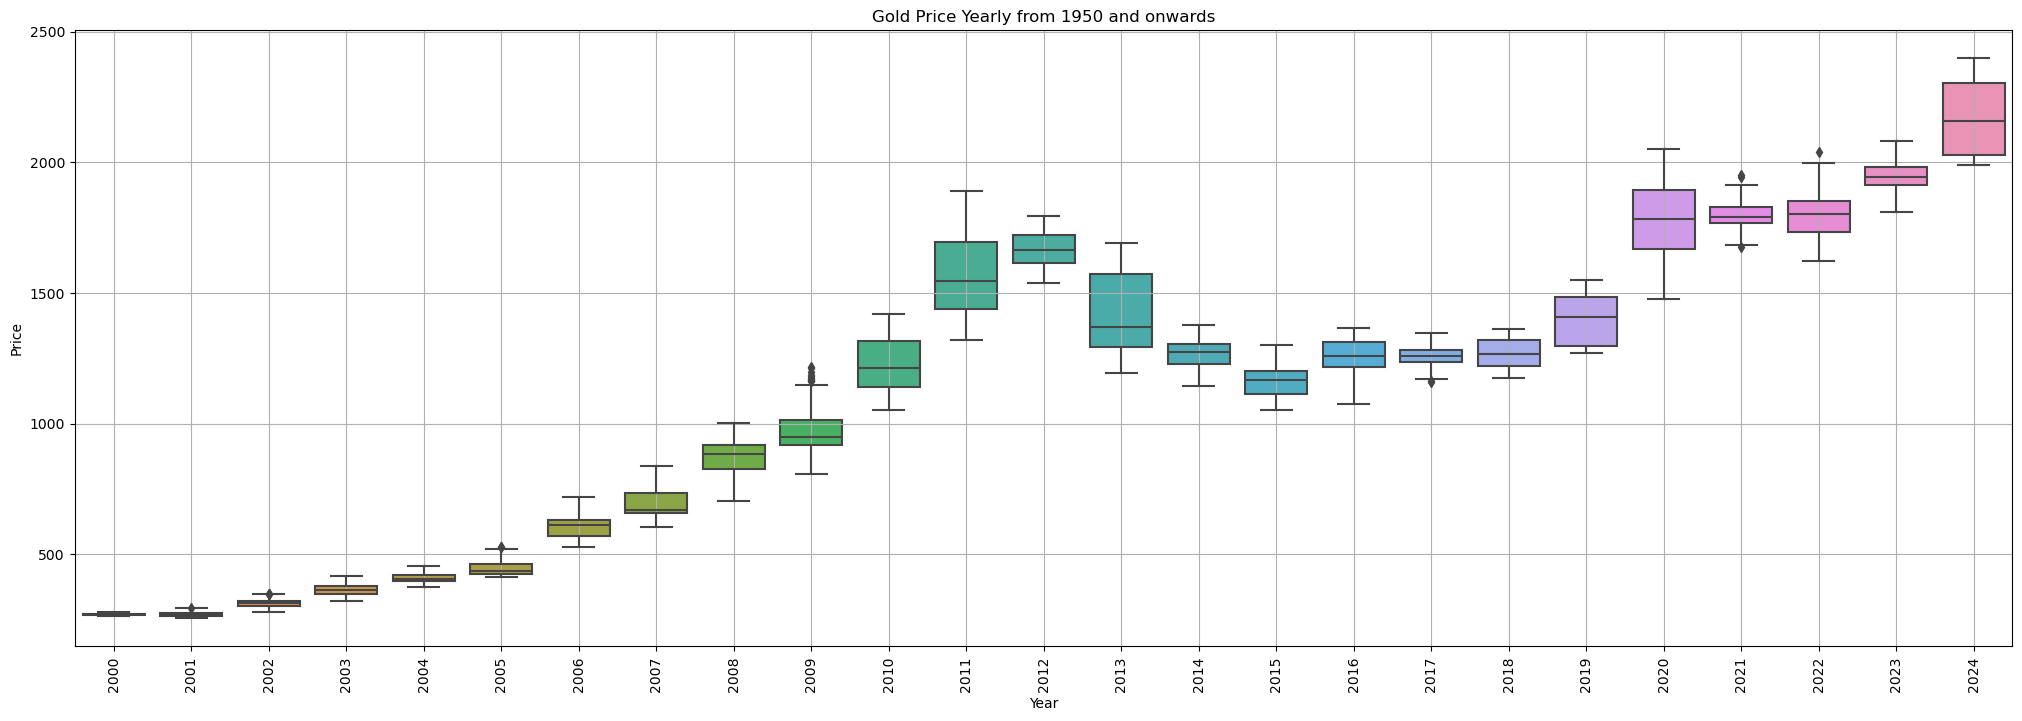

In [462]:
import seaborn as sns
plt.figure(figsize=(25,8))
sns.boxplot(x=df.index.year, y=df.values[:,0])
plt.title('Gold Price Yearly from 1950 and onwards')
plt.xlabel('Year')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.grid()
plt.show()

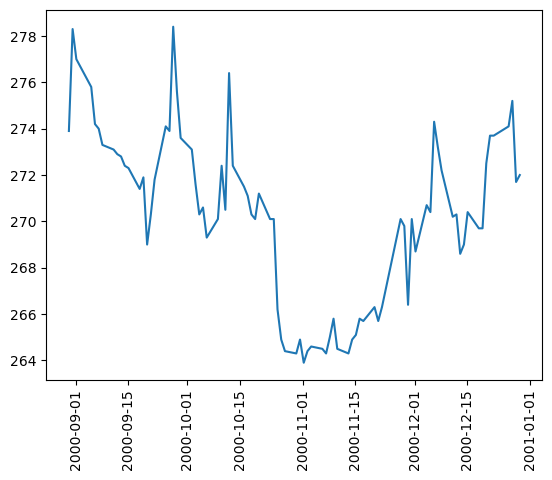

In [463]:
plt.plot(df[df.index.year == 2000].index,df[df.index.year == 2000].values)
plt.xticks(rotation=90)
plt.show()

In [368]:
df[df.index.year == 2020]

,Price
Date,
2020-01-02 05:00:00+00:00,1524.500000
2020-01-03 05:00:00+00:00,1549.199951
2020-01-06 05:00:00+00:00,1566.199951
2020-01-07 05:00:00+00:00,1571.800049
2020-01-08 05:00:00+00:00,1557.400024
...,...
2020-12-24 05:00:00+00:00,1879.900024
2020-12-28 05:00:00+00:00,1877.199951
2020-12-29 05:00:00+00:00,1879.699951


# Extract features

In [473]:
ds["Date"] = pd.to_datetime(ds["Date"],utc=True)
ds["Year"] = ds["Date"].dt.year
ds["Month"] = ds["Date"].dt.month
ds["Day"] = ds["Date"].dt.day
ds["Hour"] = ds["Date"].dt.hour
ds["Minute"] = ds["Date"].dt.minute
print(ds[["Date", "Year", "Month", "Day", "Hour", "Minute"]])

                          Date  Year  Month  Day  Hour  Minute
0    2000-08-30 04:00:00+00:00  2000      8   30     4       0
1    2000-08-31 04:00:00+00:00  2000      8   31     4       0
2    2000-09-01 04:00:00+00:00  2000      9    1     4       0
3    2000-09-05 04:00:00+00:00  2000      9    5     4       0
4    2000-09-06 04:00:00+00:00  2000      9    6     4       0
...                        ...   ...    ...  ...   ...     ...
5942 2024-05-07 04:00:00+00:00  2024      5    7     4       0
5943 2024-05-08 04:00:00+00:00  2024      5    8     4       0
5944 2024-05-09 04:00:00+00:00  2024      5    9     4       0
5945 2024-05-10 04:00:00+00:00  2024      5   10     4       0
5946 2024-05-13 04:00:00+00:00  2024      5   13     4       0

[5947 rows x 6 columns]


In [481]:
a = ds[['Year','Month','Price']]
a

,Year,Month,Price
0,2000,8,273.899994
1,2000,8,278.299988
2,2000,9,277.000000
3,2000,9,275.799988
4,2000,9,274.200012
...,...,...,...
5942,2024,5,2315.199951
5943,2024,5,2313.600098
5944,2024,5,2332.100098
5945,2024,5,2367.300049


In [283]:
#Extraact to monday-sunday

# Monday = 0, Tuesday = 1, ... , Sunday = 6
ds['dayofweek'] = ds['Date'].dt.weekday
#   weekday วันธรรมดา จ - ศ.
#   weekend วันหยุด ส - อา.
ds['weekday'] = ds['dayofweek'].apply(lambda x : 1 if x<5 else 0)
ds['weekend'] = ds['dayofweek'].apply(lambda x : 1 if x>=5 else 0)
# สัปดาห์ประจำปี
ds['Week_of_year'] = ds['Date'].dt.isocalendar().week

# shift ข้อมูลเพื่อใช้ทำนายวันก่อนหน้า
ds['Price_1_day_prior'] = ds['Price'].shift(1)
ds['Price_2_day_prior'] = ds['Price'].shift(2)
ds['Price_3_day_prior'] = ds['Price'].shift(3)
ds = ds.dropna()

In [342]:
ds

,Price,Year,Month,Day,Hour,Minute,dayofweek,weekday,weekend,Week_of_year,Price_1_day_prior,Price_2_day_prior,Price_3_day_prior
3,275.799988,2000,9,5,4,0,1,1,0,36,277.000000,278.299988,273.899994
4,274.200012,2000,9,6,4,0,2,1,0,36,275.799988,277.000000,278.299988
5,274.000000,2000,9,7,4,0,3,1,0,36,274.200012,275.799988,277.000000
6,273.299988,2000,9,8,4,0,4,1,0,36,274.000000,274.200012,275.799988
7,273.100006,2000,9,11,4,0,0,1,0,37,273.299988,274.000000,274.200012
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5942,2315.199951,2024,5,7,4,0,1,1,0,19,2321.600098,2299.000000,2299.199951
5943,2313.600098,2024,5,8,4,0,2,1,0,19,2315.199951,2321.600098,2299.000000
5944,2332.100098,2024,5,9,4,0,3,1,0,19,2313.600098,2315.199951,2321.600098
5945,2367.300049,2024,5,10,4,0,4,1,0,19,2332.100098,2313.600098,2315.199951


# Train and Test Model

To evaluate model, we will seperate data by Cycle,Seasonal

Cycle -> Year
Seasonal -> otherwise

In [285]:
ds = ds.drop('Date',axis=1)

In [289]:
from sklearn.model_selection import train_test_split
X = ds.drop("Price",axis = 1)
y = ds['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Train

In [290]:
# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [292]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse:.2f}, R2: {r2:.5f}")

MSE: 182.76, R2: 0.99941


In [294]:
X_test

,Year,Month,Day,Hour,Minute,dayofweek,weekday,weekend,Week_of_year,Price_1_day_prior,Price_2_day_prior,Price_3_day_prior
1403,2006,4,21,4,0,4,1,0,16,619.799988,632.599976,620.000000
5758,2023,8,15,4,0,1,1,0,33,1910.599976,1912.900024,1914.400024
5812,2023,10,31,4,0,1,1,0,44,1996.199951,1988.599976,1987.199951
1703,2007,7,2,4,0,0,1,0,27,648.099976,647.500000,641.700012
5014,2020,8,28,4,0,4,1,0,35,1921.599976,1940.699951,1911.800049
...,...,...,...,...,...,...,...,...,...,...,...,...
2577,2010,12,17,5,0,4,1,0,50,1370.400024,1385.500000,1403.599976
15,2000,9,21,4,0,3,1,0,38,269.000000,271.899994,271.399994
1120,2005,3,2,5,0,2,1,0,9,432.899994,436.500000,434.899994
4325,2017,11,30,5,0,3,1,0,48,1282.099976,1294.699951,1293.800049


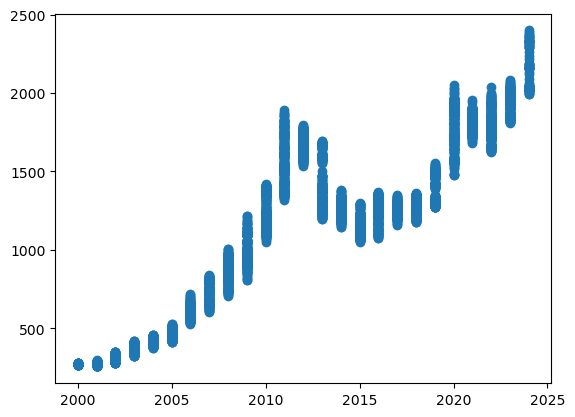

In [308]:
sns.boxplot(x=df.index.year, y=df.values[:,0])
plt.show()

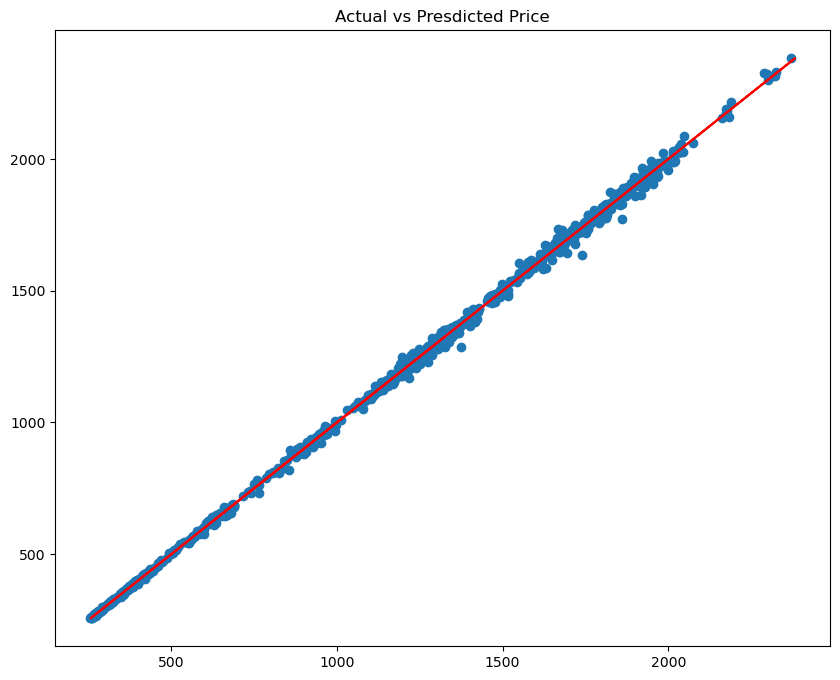

In [305]:
#Plot model
plt.figure(figsize=(10,8))
plt.title("Actual vs Presdicted Price")
plt.plot(y_test,y_test,color = "red")
plt.scatter(y_pred,y_test,label = "Predicted Price")
plt.show()

In [341]:
X_test.sample(5)

,Year,Month,Day,Hour,Minute,dayofweek,weekday,weekend,Week_of_year,Price_1_day_prior,Price_2_day_prior,Price_3_day_prior
3298,2013,10,30,4,0,2,1,0,44,1345.199951,1352.000000,1352.400024
4236,2017,7,26,4,0,2,1,0,30,1251.699951,1253.900024,1254.300049
5895,2024,2,29,5,0,3,1,0,9,2033.000000,2034.000000,2028.500000
3321,2013,12,3,5,0,1,1,0,49,1222.300049,1250.599976,1237.800049
112,2001,2,12,5,0,0,1,0,7,259.899994,260.100006,262.799988
